In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import stats

In [2]:
df = pd.read_csv('traffic.csv')

In [3]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


This dataset contains different event ['click', 'preview', 'pageview'] linked to artist, album, track, country, city and date <br>
isrc - it is unique id for music/video, so every track has unique isrc <br>
Data were collected for 6 days 19-08-2021 - 25.08.2021

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


Total pageview events in the full period and per day

In [6]:
#dataset cointains three types of events: pagieview, click, preview
df['event'].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [9]:
#total pagieview events is the number of rows where "event" == "pagieview"
df[df['event']=='pageview'].size[0]

142015

In [14]:
pageview_perday = df[df['event'] == 'pageview'].groupby('date').size().to_frame('pageview_perday')
pageview_perday 

,pageview_perday
date,
2021-08-19,22366
2021-08-20,21382
2021-08-21,21349
2021-08-22,20430
2021-08-23,18646
2021-08-24,18693
2021-08-25,19149


The same user views the same page multiple times, it will be counted each time. <br> 
Use df.drop_duplicates() to modify this behaviour and see the difference.

In [18]:
df_deduplicated = df.drop_duplicates()

In [19]:
df_deduplicated["event"].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

In [20]:
df_deduplicated[df_deduplicated["event"] == "pageview"].shape[0]

73360

In [21]:
df_deduplicated[df_deduplicated["event"] == "pageview"].groupby(by="date")["event"].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

Other events in the full period and per day using a loop 

In [25]:
# get the set of recorded events in the data
recorded_events = set(df["event"].unique())
recorded_events

{'click', 'pageview', 'preview'}

In [26]:
for recorded_event in recorded_events:
    # get the total number of occurrences
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    # group by the date and aggregate by count
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 

Total number of pageview events is 142015 

pageview event distribution per day:

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64 

Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 



Which countries did the pageviews come from?

In [35]:
# filter for the proper event
df_q3 = df[df["event"] == "click"]
# or alternatively, you can loop over the array provided by df.unique() and print them all
pd.DataFrame(data=df_q3["country"].dropna().unique(), columns=["Country"])

,Country
0,Saudi Arabia
1,India
2,France
3,Maldives
4,United States
...,...
197,Guernsey
198,Palau
199,Åland
200,Principality of Monaco


In [32]:
pd.DataFrame(data=countries, columns=['Country'])

,Country
0,Saudi Arabia
1,United States
2,Ireland
3,United Kingdom
4,France
...,...
206,Afghanistan
207,Central African Republic
208,Guernsey
209,Sint Maarten



The overall click rate (clicks/pageviews)? <br>
The click rate is the number of clicks that a page has received (event = 'click') divided by the number of time it has been shown (event = 'pageview'). 

In [40]:
#filter only "clicks" and grouped them by "linkid"
link_clicks = df[df['event'] == 'click'].groupby(by='linkid')['event'].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})

#do the same for the "pageview" events
link_pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
link_pageviews = pageviews.rename(columns={
    "event": "pageviews"
})

In [41]:
link_clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [42]:
link_pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


In [43]:
#join these two Dataframes on the same link Id
df_q4 = pd.merge(left = link_clicks, right = link_pageviews, on = 'linkid', how = 'inner')

In [46]:
df_q4['click_rate'] = df_q4['clicks']/df_q4['pageviews']

In [47]:
df_q4

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


Distribution of clickrate across different links

To get distribution of clickrate acrossdifferent links use the describe() method

In [49]:
df_q4['click_rate'].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

Text(0.5, 0, 'Click Rate')

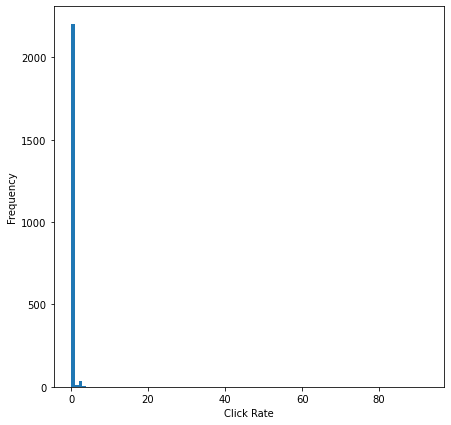

In [50]:
ax = df_q4['click_rate'].plot(kind='hist', figsize=(7,7), bins=100)
ax.set_xlabel("Click Rate")

Data is highly skewed to left, i.e., many of its values are very close to zero. <br>
In such cases, a common workaround is to plot the histogram of the logarithm of the data

Text(0.5, 0, 'Log 2 click Rate')

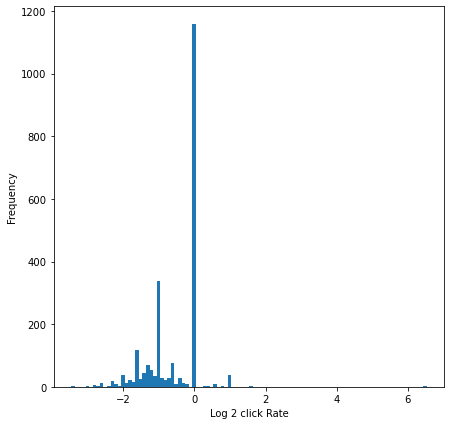

In [51]:
df_q4['click_rate_log2'] = np.log2(df_q4['click_rate'])
ax = df_q4['click_rate_log2'].plot(kind='hist', figsize=(7,7), bins=100)
ax.set_xlabel("Log 2 click Rate")

Doing these we remove all linkid where the ratio is 0, because  natural logarithm of zero is undefined Log(1) = 0 <br>
<br>
There is enormous spike at the 0 meaning that the actual click rate was 1
It means there were many link id which where click and preview only once

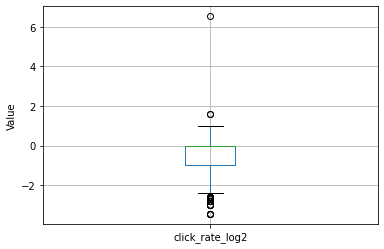

In [52]:
ax = df_q4.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")

Correlation between clicks and previews on a link

Pearson's correlation coefficient is a measure of linear correlation between two dataset. It takes its value in the range og [-1,1] and futher it is from zero, the more significant the correlation is <br>
<br>
Pearson's coefficient is implemented in both Pandas and Scipy, and i am  going to use both libraries, just to explore their APIs and to compare results (should be the same)

In [53]:
df_q6 = df[df['event'].isin(['click','preview'])]

In [60]:
df_q6.head(1)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [54]:
df_q6.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


In [56]:
# filter only 'click' events and group them by the 'linkid' and get value_counts
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})

In [57]:
link_clicks

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3
...,...,...
2250,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29
2251,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
2252,fff84c0e-90a1-59d8-9997-adc909d50e16,1
2253,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1


In [61]:
# perform two database-style joins to append the 
# number of link clicks and previews to each row
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")

In [62]:
df_q6.head()

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0


In [65]:
df_q6.dropna(subset=["clicks", "previews"], inplace=True)
df_q6.head()

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0


We calculate the person corr

In [66]:
df_q6.corr()

,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000


In [67]:
stats.pearsonr(x=df_q6["clicks"], y=df_q6["previews"])

(0.9987125072008537, 0.0)

Corr between the categorical data <br>
Using pd.factorize() we can quantify the relationship between categorical variables in similar manner as with numerical variables. 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [69]:
categorical_columns = ['country','city','artist','album','track']

In [70]:
factorized_df = df_q6[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr()

In [71]:
factorized_df

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


In [79]:
df_q6[['country','city','artist','album','track']]

,country,city,artist,album,track
0,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby
1,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby
2,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty
3,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más
4,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby
...,...,...,...,...,...
84258,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby
84259,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life
84260,Ukraine,Kyiv,Miscél,when you left,when you left
84261,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful
